<a href="https://colab.research.google.com/github/SXV357/Inspirit-AI-ML-Basics-Notebooks/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown 
import pandas as pd
from sklearn import metrics

# gdown.download('https://drive.google.com/uc?id=1grV8hSxULsGvnbwEMPjPaknccfIOlcoB','cancer_data.csv',True);

from google.cloud import storage
def download_public_file(bucket_name, source_blob_name, destination_file_name):
    storage_client = storage.Client.create_anonymous_client()

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

    print(
        "Downloaded public blob {} from bucket {} to {}.".format(
            source_blob_name, bucket.name, destination_file_name
        )
    )

download_public_file('inspirit-ai-data-bucket-1','Data/AI Scholars/Sessions 1 - 5/Session 2b - Logistic Regression/cancer.csv','cancer_data.csv')

data = pd.read_csv('cancer_data.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer_data.csv')
del data

Downloaded public blob Data/AI Scholars/Sessions 1 - 5/Session 2b - Logistic Regression/cancer.csv from bucket inspirit-ai-data-bucket-1 to cancer_data.csv.


In [2]:
import os             
import numpy as np    
import pandas as pd   
from sklearn.metrics import accuracy_score 

In [3]:
data_path  = 'cancer_data.csv'

dataframe = pd.read_csv(data_path)

dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]
dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

In [4]:
dataframe.head(20)

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.30010,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.08690,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.19740,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.24140,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.19800,0.1809,1 (malignant)
5,1,82.57,12.45,15.70,477.1,0.12780,0.15780,0.2087,1 (malignant)
6,1,119.60,18.25,19.98,1040.0,0.09463,0.11270,0.1794,1 (malignant)
7,1,90.20,13.71,20.83,577.9,0.11890,0.09366,0.2196,1 (malignant)
8,1,87.50,13.00,21.82,519.8,0.12730,0.18590,0.2350,1 (malignant)
9,1,83.97,12.46,24.04,475.9,0.11860,0.22730,0.2030,1 (malignant)


In [5]:
dataframe.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   diagnosis        569 non-null    int64   
 1   perimeter_mean   569 non-null    float64 
 2   radius_mean      569 non-null    float64 
 3   texture_mean     569 non-null    float64 
 4   area_mean        569 non-null    float64 
 5   smoothness_mean  569 non-null    float64 
 6   concavity_mean   569 non-null    float64 
 7   symmetry_mean    569 non-null    float64 
 8   diagnosis_cat    569 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 36.4 KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 

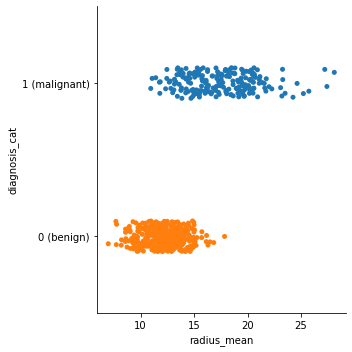

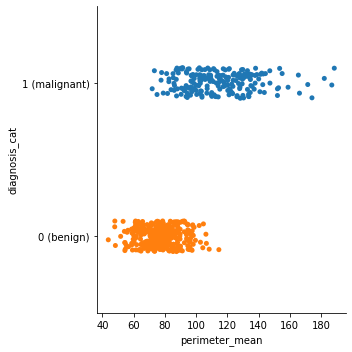

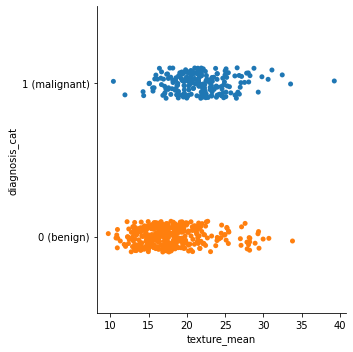

In [8]:
# checking relationship between various features and diagnosis
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order = ['1 (malignant)', '0 (benign)']) # should match categories of y-axis variable
sns.catplot(x = 'perimeter_mean', y = 'diagnosis_cat', data = dataframe, order = ['1 (malignant)', '0 (benign)'])
sns.catplot(x = 'texture_mean', y = 'diagnosis_cat', data = dataframe, order = ['1 (malignant)', '0 (benign)'])

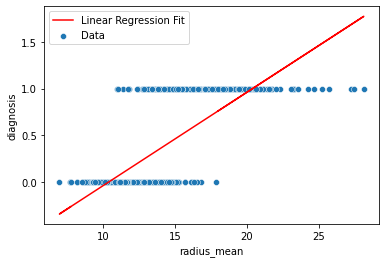

In [10]:
# attempting to use LR to classify cells as cancerous or non-cancerous

from sklearn import linear_model

X,y = dataframe[['radius_mean']], dataframe[['diagnosis']] # grabbing the specific column

model = linear_model.LinearRegression() # creating model
model.fit(X, y) # training model
predicted_y = model.predict(X)

sns.scatterplot(x='radius_mean', y='diagnosis', data=dataframe)
plt.plot(X, predicted_y, color='r')
plt.legend(['Linear Regression Fit', 'Data'])

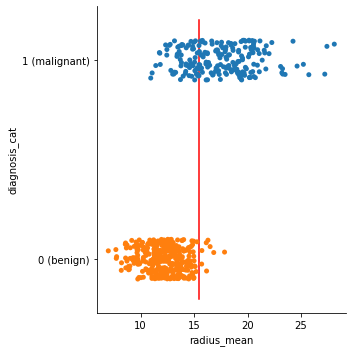

In [12]:
# using boundary classifier

target_boundary = 15.5
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([target_boundary, target_boundary], [-.2, 1.2], 'r') 

In [13]:
# implementing simple boundary classifier

def boundary_classifier(target_boundary, radius_mean_series):
  predictions = []
  for radius_mean in radius_mean_series:
    if radius_mean > target_boundary:
      predictions.append(1) # cell is malignant
    else:
      predictions.append(0) # cell is benign(anything to the left of the boundary line we classified)
  return predictions

Number of malignant cells in predicted model: 173, Number of malignant cells in actual model: 212
Number of benign cells in predicted model: 396, Number of benign cells in actual model: 357


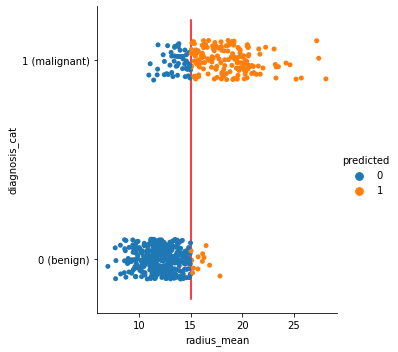

In [14]:
# using a random boundary value and running the classifier
boundary_value = 15

y_pred = boundary_classifier(boundary_value, dataframe['radius_mean'])
dataframe['predicted'] = y_pred
#new entry in dataframe that contains array of predicted y valyues

y_true = dataframe['diagnosis']

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([boundary_value, boundary_value], [-.2, 1.2], 'r')

count_zero_pred = 0
count_one_pred = 0

count_zero_true = 0
count_one_true = 0

for i in y_pred:
  if i == 0:
    count_zero_pred += 1
  elif i == 1:
    count_one_pred += 1

for j in y_true:
  if j == 0:
    count_zero_true += 1
  elif j == 1:
    count_one_true += 1


print(f'Number of malignant cells in predicted model: {count_one_pred}, Number of malignant cells in actual model: {count_one_true}')
print(f'Number of benign cells in predicted model: {count_zero_pred}, Number of benign cells in actual model: {count_zero_true}')

In [15]:
accuracy = accuracy_score(y_true,y_pred) # accuracy_score used to calculate accuracy
print(f'The accuracy of this boundary classifier is {round(accuracy * 100, 2)} %')

The accuracy of this boundary classifier is 88.93 %


In [17]:
# using logistic regression to determine optimal boundary

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.18, random_state = 1)

In [18]:
print('Number of rows in training dataframe:', train_df.shape[0])
train_df.head()

Number of rows in training dataframe: 466


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
347,0,94.87,14.76,14.74,668.7,0.08875,0.04608,0.1521,0 (benign),0
462,0,92.25,14.40,26.99,646.1,0.06995,0.03476,0.1707,0 (benign),0
165,0,95.50,14.97,19.76,690.2,0.08421,0.01947,0.1515,0 (benign),0
550,0,68.51,10.86,21.48,360.5,0.07431,0.00000,0.1661,0 (benign),0
295,0,88.06,13.77,13.27,582.7,0.09198,0.01063,0.1592,0 (benign),0


In [19]:
print('Number of rows in test dataframe:', test_df.shape[0])
test_df.head()

Number of rows in test dataframe: 103


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
421,0,98.22,14.69,13.98,656.1,0.10310,0.14500,0.2086,0 (benign),0
47,1,85.98,13.17,18.66,534.6,0.11580,0.12260,0.2128,1 (malignant),0
292,0,83.14,12.95,16.02,513.7,0.10050,0.06155,0.1730,0 (benign),0
186,1,118.60,18.31,18.58,1041.0,0.08588,0.08169,0.1621,1 (malignant),1
414,1,96.71,15.13,29.81,719.5,0.08320,0.04686,0.1852,1 (malignant),1


In [20]:
X = ['radius_mean']
y = 'diagnosis' # exists as a string in original dataframe so no need for brackets

X_train = train_df[X] # subsetting radius from training dataset
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

X_train, our input variables:
     radius_mean
347        14.76
462        14.40
165        14.97
550        10.86
295        13.77

y_train, our output variable:
347    0
462    0
165    0
550    0
295    0
Name: diagnosis, dtype: int64


In [21]:
logreg_model = linear_model.LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# designating testing inputs and outputs for model
X_test = test_df[X]
y_test = test_df[y]
print(X_test.head())
print()
print(y_test.head())

     radius_mean
421        14.69
47         13.17
292        12.95
186        18.31
414        15.13

421    0
47     1
292    0
186    1
414    1
Name: diagnosis, dtype: int64


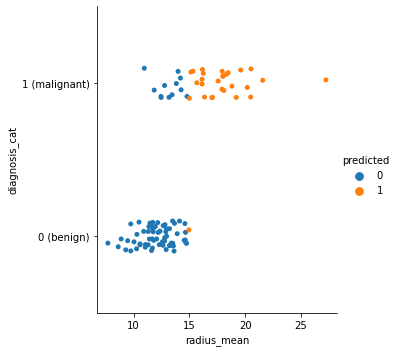

In [24]:
## YOUR CODE HERE
y_pred = logreg_model.predict(X_test)
test_df['predicted'] = y_pred.squeeze()
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

In [25]:
# evaluating accuracy of model

accuracy = accuracy_score(y_test, y_pred)
print(f'{round(accuracy * 100, 2)}%')

87.38%


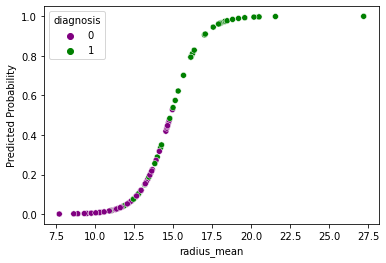

In [26]:
# plotting soft predictions for testing dataset
y_prob = logreg_model.predict_proba(X_test)
X_test_view = X_test[X].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x = X_test_view, y = y_prob[:,1], hue = y_test, palette=['purple','green'])

In [27]:
#multiple-feature logistic regression

dataframe.head()

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant),1
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant),1
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant),1
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant),0
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant),1


In [28]:
X = ['texture_mean']
y = 'diagnosis'


train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

new_X_train = train_df[X]
new_X_test = test_df[X]
new_y_train = train_df[y]
new_y_test = test_df[y]

new_log_reg = linear_model.LogisticRegression()

new_log_reg.fit(new_X_train, new_y_train)

new_y_pred = new_log_reg.predict(new_X_test)

new_accuracy = accuracy_score(new_y_test, new_y_pred) # test data for y vs predicted data for y
print(f'The new accuracy is {round(new_accuracy * 100, 2)}%')

print(new_y_test.head())
print(new_y_pred)

The new accuracy is 68.42%
421    0
47     1
292    0
186    1
414    1
Name: diagnosis, dtype: int64
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0]


In [29]:
dataframe.head(1)

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
0,1,122.8,17.99,10.38,1001.0,0.1184,0.3001,0.2419,1 (malignant),1


In [30]:
# logreg with multiple features

multi_X = ['radius_mean', 'area_mean']
y = 'diagnosis'


multi_train_df, multi_test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)


multiple_X_train = multi_train_df[multi_X]
multiple_X_test = multi_test_df[multi_X]
multiple_y_train = multi_train_df[y]
multiple_y_test = multi_test_df[y]


multiple_log_reg = linear_model.LogisticRegression()

multiple_log_reg.fit(multiple_X_train, multiple_y_train)

new_multiple_y_pred = multiple_log_reg.predict(multiple_X_test)

new_multiple_accuracy = accuracy_score(multiple_y_test, new_multiple_y_pred)
print(f'New accuracy with multiple factors is {round(new_multiple_accuracy*100, 2)}%')

New accuracy with multiple factors is 86.84%


Text(0.5, 257.44, 'Predicted diagnosis')

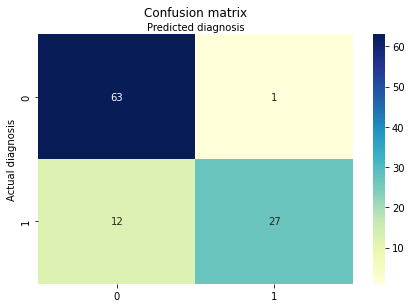

In [32]:
# plotting confusion matrix to evaluate success of model

from sklearn import metrics

# y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories
# 1 - malignant cell
# 2 - benign cell

fig, ax = plt.subplots()
# Setting up and visualizing the plot
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In [33]:
print(cnf_matrix[0])
print(cnf_matrix[1])
(tn, fp), (fn, tp) = cnf_matrix
print ("TN, FP, FN, TP:", tn, fp, fn, tp)

[63  1]
[12 27]
TN, FP, FN, TP: 63 1 12 27


In [34]:
# experimenting with different metrics and checking for best accuracy

import math

# using phi coefficient
new_model_accuracy = ((tp * tn) - (fp * fn)) / math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
print(f'The accuracy of this confusion matrix according to the phi coefficient is {round(new_model_accuracy * 100, 2)}%')

# using fowlkes mallows index
new_model_accuracy2 = math.sqrt((tp / (tp + fp)) * (tp / (tp + fn)))
print(f'The accuracy of this confusion matrix according to the fowlkes mallows index is {round(new_model_accuracy2 * 100, 2)}%')

# using f1 score
new_model_accuracy3 = (2 * tp) / ((2 * tp) + fp + fn)
print(f'The accuracy of this confusion matrix according to the f1 score is {round(new_model_accuracy3 * 100, 2)}%')

The accuracy of this confusion matrix according to the phi coefficient is 73.77%
The accuracy of this confusion matrix according to the fowlkes mallows index is 81.71%
The accuracy of this confusion matrix according to the f1 score is 80.6%


[Text(0.5, 0.875, 'X[0] <= 15.045\ngini = 0.467\nsamples = 466\nvalue = [293, 173]'),
 Text(0.25, 0.625, 'X[0] <= 13.095\ngini = 0.209\nsamples = 320\nvalue = [282, 38]'),
 Text(0.125, 0.375, 'X[0] <= 11.07\ngini = 0.072\nsamples = 214\nvalue = [206, 8]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]'),
 Text(0.1875, 0.125, 'gini = 0.107\nsamples = 141\nvalue = [133, 8]'),
 Text(0.375, 0.375, 'X[0] <= 14.955\ngini = 0.406\nsamples = 106\nvalue = [76, 30]'),
 Text(0.3125, 0.125, 'gini = 0.42\nsamples = 100\nvalue = [70, 30]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.625, 'X[0] <= 16.93\ngini = 0.139\nsamples = 146\nvalue = [11, 135]'),
 Text(0.625, 0.375, 'X[0] <= 16.81\ngini = 0.34\nsamples = 46\nvalue = [10, 36]'),
 Text(0.5625, 0.125, 'gini = 0.32\nsamples = 45\nvalue = [9, 36]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'X[0] <= 17.9\ngini = 0.02\nsamples = 100\nvalue = [1, 99]'),
 

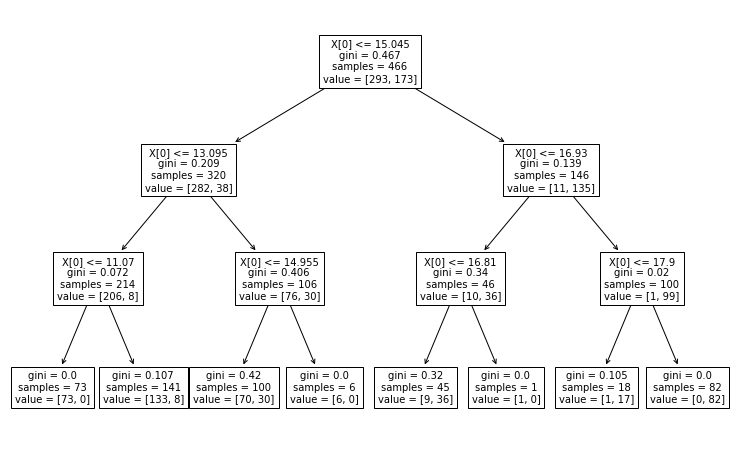

In [38]:
# using decision trees

from sklearn import tree

class_dt = tree.DecisionTreeClassifier(max_depth=3)

class_dt.fit(X_train, y_train)

#visualize + interpret tree
plt.figure(figsize=(13,8))  # set plot size
tree.plot_tree(class_dt, fontsize=10)

In [39]:
y_pred = class_dt.predict(X_test)

#calculating model performance
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.8737864077669902
Precision:  1.0
Recall:  0.6666666666666666
